# ESERCITAZIONE 3

In [1]:
import pandas as pd

# Dataset con dati mancanti rappresentati da None o NaN
dataset = [
    {"età": 25, "punteggio": 90, "ammesso": 1},
    {"età": None, "punteggio": 85, "ammesso": 0},
    {"età": 28, "punteggio": None, "ammesso": 1},
    {"età": None, "punteggio": 75, "ammesso": 1},
    {"età": 23, "punteggio": None, "ammesso": None},
    {"età": 23, "punteggio": 77, "ammesso": None},
]
#NaN = Not a Number
df = pd.DataFrame(dataset)
df

età  punteggio  ammesso
0  25.0       90.0      1.0
1   NaN       85.0      0.0
2  28.0        NaN      1.0
3   NaN       75.0      1.0
4  23.0        NaN      NaN
5  23.0       77.0      NaN

In [2]:
df["ammesso"]

0    1.0
1    0.0
2    1.0
3    1.0
4    NaN
5    NaN
Name: ammesso, dtype: float64

In [3]:
# Identificazione delle righe con dati mancanti
righe_con_dati_mancanti = df[df.isnull().any(axis=1)]
# Con axis[1] dico di contarli sulle righe
righe_con_dati_mancanti

età  punteggio  ammesso
1   NaN       85.0      0.0
2  28.0        NaN      1.0
3   NaN       75.0      1.0
4  23.0        NaN      NaN
5  23.0       77.0      NaN

In [4]:
#Conta quante righe con dati mancanti ci sono in totale
totale_dati_mancanti = righe_con_dati_mancanti.shape[0]
# Con shape[0] dico di contarli sulle righe
totale_dati_mancanti

5

In [5]:
import pandas as pd

# Dataset con dati mancanti rappresentati da None o NaN
dataset = [
    {"nome": "Alice", "età": 25, "punteggio": 90, "email": "alice@email.com"},
    {"nome": "Bob", "età": 22, "punteggio": None, "email": None},
    {"nome": "Charlie", "età": 28, "punteggio": 75, "email": "charlie@email.com"},
]

# Converti il dataset in un DataFrame
df = pd.DataFrame(dataset)
df

nome  età  punteggio              email
0    Alice   25       90.0    alice@email.com
1      Bob   22        NaN               None
2  Charlie   28       75.0  charlie@email.com

In [6]:
#Rimuovi le righe con dati mancanti
df1=df.dropna(inplace=False)
df1

nome  età  punteggio              email
0    Alice   25       90.0    alice@email.com
2  Charlie   28       75.0  charlie@email.com

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Genera dati di esempio
data = {
    'Variable1': [1, 2, 3, 4, 5],
    'Variable2': [1, 2, np.nan, 4, np.nan],
    'Missing_Column': ['A', 'B', 'A', 'C', np.nan]
}
# Crea un DataFrame
df = pd.DataFrame(data)
df1=pd.DataFrame()
df

Variable1  Variable2 Missing_Column
0          1        1.0              A
1          2        2.0              B
2          3        NaN              A
3          4        4.0              C
4          5        NaN            NaN

In [8]:
numeric_cols = df.select_dtypes(include=["number"])
numeric_cols.columns

Index(['Variable1', 'Variable2'], dtype='object')

In [9]:
df1[numeric_cols.columns] = df[numeric_cols.columns].fillna(df[numeric_cols.columns].mean())
df1

Variable1  Variable2
0          1   1.000000
1          2   2.000000
2          3   2.333333
3          4   4.000000
4          5   2.333333

In [10]:
categorical_cols = df.select_dtypes(exclude=["number"])
categorical_cols.columns

Index(['Missing_Column'], dtype='object')

In [11]:
#Trattamento dei missing values nelle variabili categoriche
categorical_cols = df.select_dtypes(exclude=['number'])
categorical_cols.columns

Index(['Missing_Column'], dtype='object')

In [12]:
df1[categorical_cols.columns] = df[categorical_cols.columns].fillna(df[categorical_cols.columns].mode().iloc[0])
df1

Variable1  Variable2 Missing_Column
0          1   1.000000              A
1          2   2.000000              B
2          3   2.333333              A
3          4   4.000000              C
4          5   2.333333              A

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Genera dati di esempio
data = {
    'Feature1': [1, 2, np.nan, 4, 5],
    'Feature2': [np.nan, 2, 3, 4, np.nan],
    'Feature3': [1, np.nan, 3, 4, 5]
}
# Crea un DataFrame
df = pd.DataFrame(data)
df

Feature1  Feature2  Feature3
0       1.0       NaN       1.0
1       2.0       2.0       NaN
2       NaN       3.0       3.0
3       4.0       4.0       4.0
4       5.0       NaN       5.0

In [14]:
df.isnull()

Feature1  Feature2  Feature3
0     False      True     False
1     False     False      True
2      True     False     False
3     False     False     False
4     False      True     False

In [15]:
df.isnull().sum()

Feature1    1
Feature2    2
Feature3    1
dtype: int64

In [16]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent

Feature1    20.0
Feature2    40.0
Feature3    20.0
dtype: float64

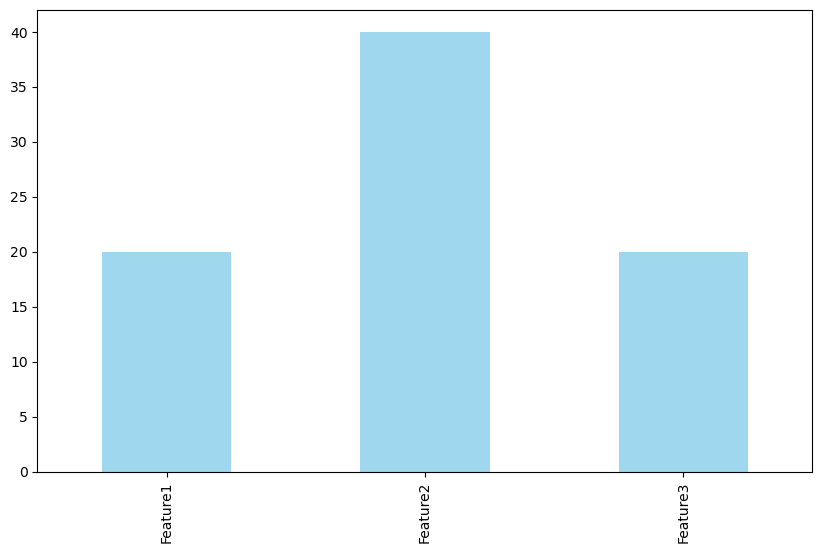

In [17]:
#Crea il grafico a barre
plt.figure(figsize=(10, 6))
missing_percent.plot(kind='bar', color='skyblue', alpha=0.8)
plt.show()


In [18]:
missing_matrix = df.isnull()
missing_matrix

Feature1  Feature2  Feature3
0     False      True     False
1     False     False      True
2      True     False     False
3     False     False     False
4     False      True     False

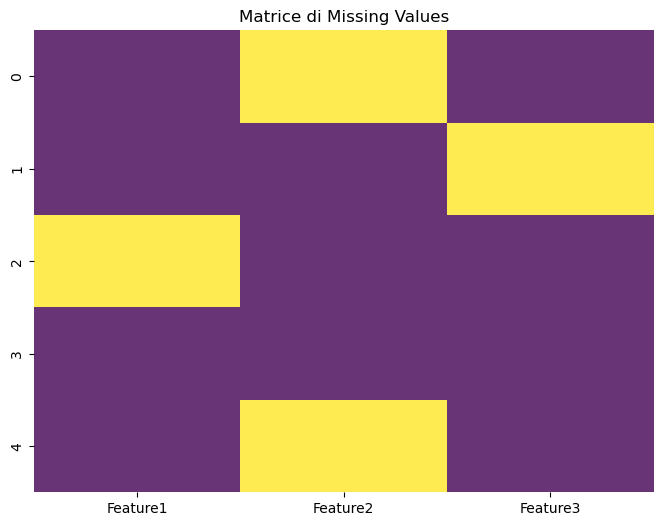

In [19]:
# Crea una heatmap colorata.
plt.figure(figsize=(8, 6))
sns.heatmap(missing_matrix, cmap='viridis', cbar=False,alpha=0.8)
plt.title('Matrice di Missing Values')
plt.show()

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Genera dati di esempio
data = {
    'Feature1': [1, 2, np.nan, 4, 5],
    'Feature2': [np.nan, 2, 3, 4, np.nan],
    'Feature3': [1, np.nan, 3, 4, 5]
}

# Crea un DataFrame
df = pd.DataFrame(data)

# Calcola la matrice di missing values
missing_matrix = df.isnull()
missing_matrix

Feature1  Feature2  Feature3
0     False      True     False
1     False     False      True
2      True     False     False
3     False     False     False
4     False      True     False

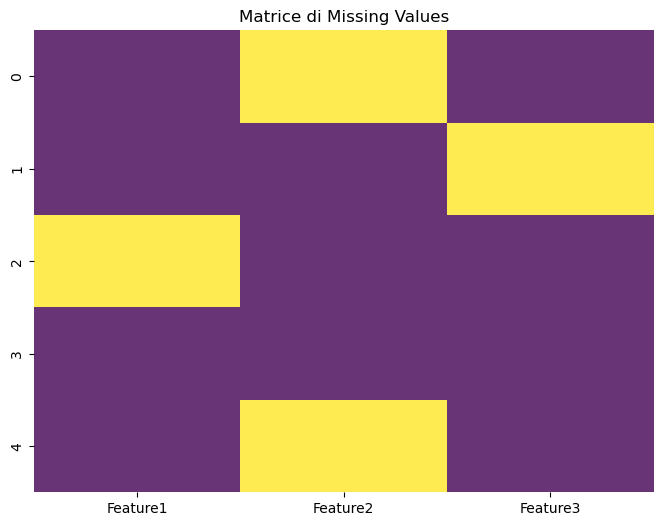

In [21]:
# Crea una heatmap colorata.
plt.figure(figsize=(8, 6))
sns.heatmap(missing_matrix, cmap='viridis', cbar=False,alpha=0.8)
plt.title('Matrice di Missing Values')
plt.show()


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Genera dati casuali per l'esplorazione
np.random.seed(2)
data = {
    'Età': np.random.randint(18, 70, size=1000),
    'Genere': np.random.choice(['Maschio', 'Femmina'], size=1000),
    'Punteggio': np.random.uniform(0, 100, size=1000),
    'Reddito': np.random.normal(50000, 15000, size=1000)
}

df = pd.DataFrame(data)

# Visualizza le prime righe del dataset
print(df.head())

   Età   Genere  Punteggio       Reddito
0   58  Maschio  93.309731  55174.034340
1   33  Femmina  97.279382  65873.059029
2   63  Femmina  91.185842  63246.553249
3   26  Femmina  75.926276  44534.875858
4   40  Maschio  25.156395  73444.267270


In [23]:
print(df.info())

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Età        1000 non-null   int32  
 1   Genere     1000 non-null   object 
 2   Punteggio  1000 non-null   float64
 3   Reddito    1000 non-null   float64
dtypes: float64(2), int32(1), object(1)
memory usage: 27.5+ KB
None
               Età    Punteggio       Reddito
count  1000.000000  1000.000000   1000.000000
mean     44.205000    48.687071  50036.084395
std      14.986847    29.617200  15027.142896
min      18.000000     0.090182   6017.070033
25%      31.000000    22.373740  39577.758808
50%      44.000000    47.030664  50994.854630
75%      58.000000    75.439618  60933.234680
max      69.000000    99.713537  96435.848804


In [24]:
missing_data = df.isnull().sum()
print("Valori mancanti per ciascuna colonna: ")
print(missing_data)

Valori mancanti per ciascuna colonna: 
Età          0
Genere       0
Punteggio    0
Reddito      0
dtype: int64


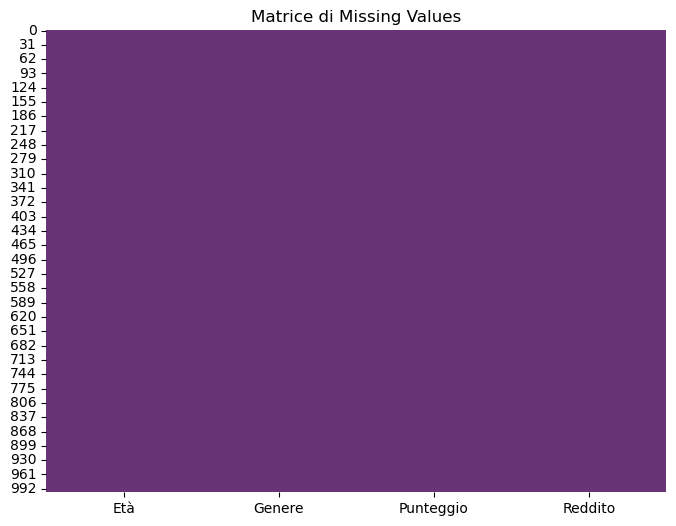

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False,alpha=0.8)
plt.title('Matrice di Missing Values')
plt.show()

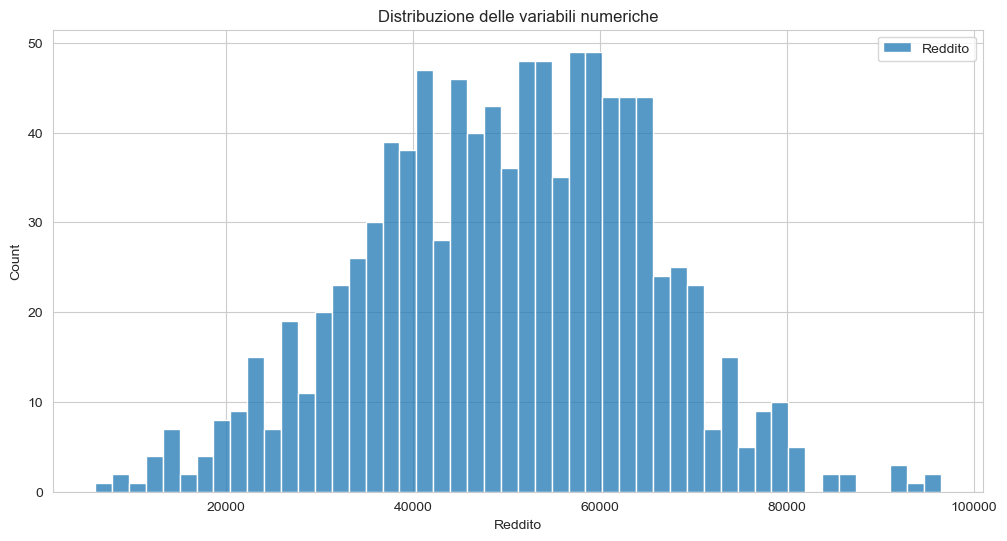

In [26]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.histplot(df["Reddito"], kde=False, bins=50, label="Reddito")
plt.legend()
plt.title('Distribuzione delle variabili numeriche')
plt.show()

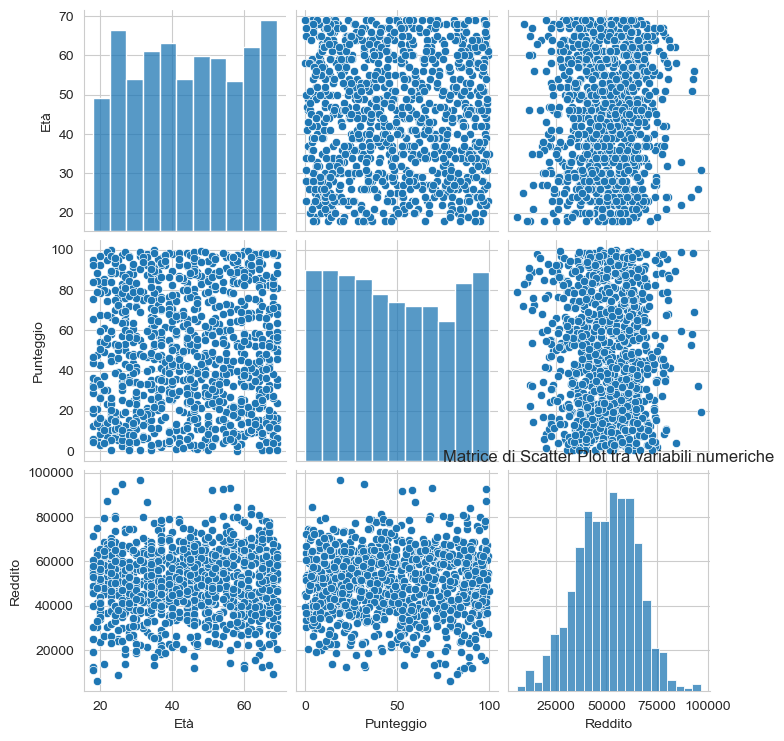

In [27]:
numeric_features = df.select_dtypes(include=[np.number])
sns.pairplot(df[numeric_features.columns])
plt.title("Matrice di Scatter Plot tra variabili numeriche")
plt.show()

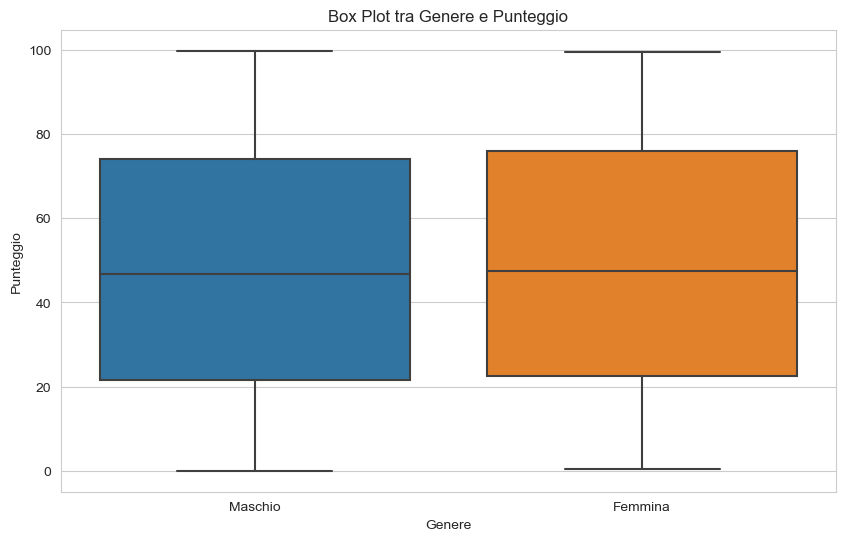

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Genere", y="Punteggio", data=df)
plt.title("Box Plot tra Genere e Punteggio")
plt.show()

In [29]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [30]:
import plotly.express as px

fig = px.scatter(df, x="Età", y="Reddito", color="Genere", size="Punteggio")
fig.update_layout(title="Grafico a dispersione interattivo")
fig.show()

        Data  Vendite Prodotto
0 2023-01-01      985        C
1 2023-01-02      232        B
2 2023-01-03      912        C
3 2023-01-04      456        B
4 2023-01-05      458        A


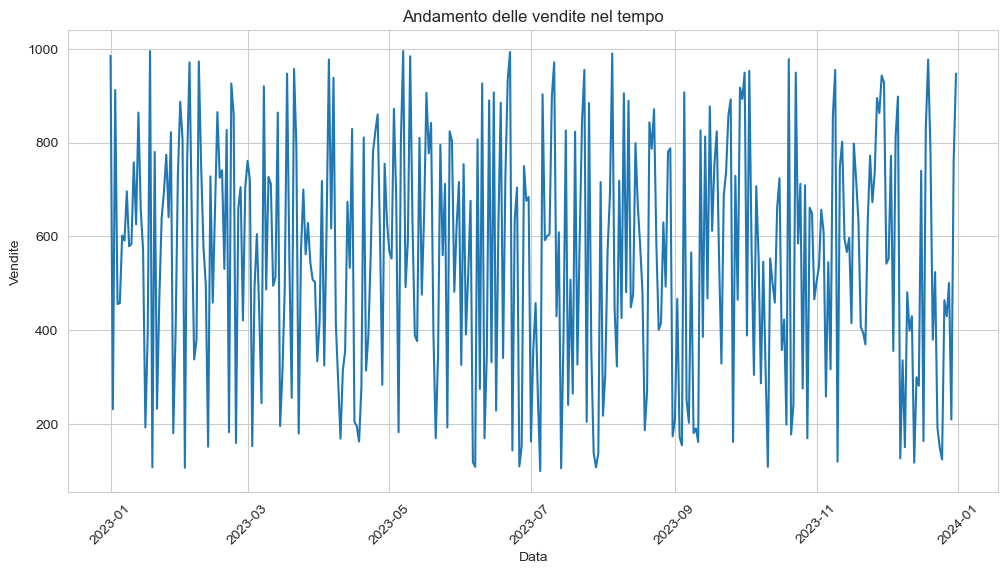

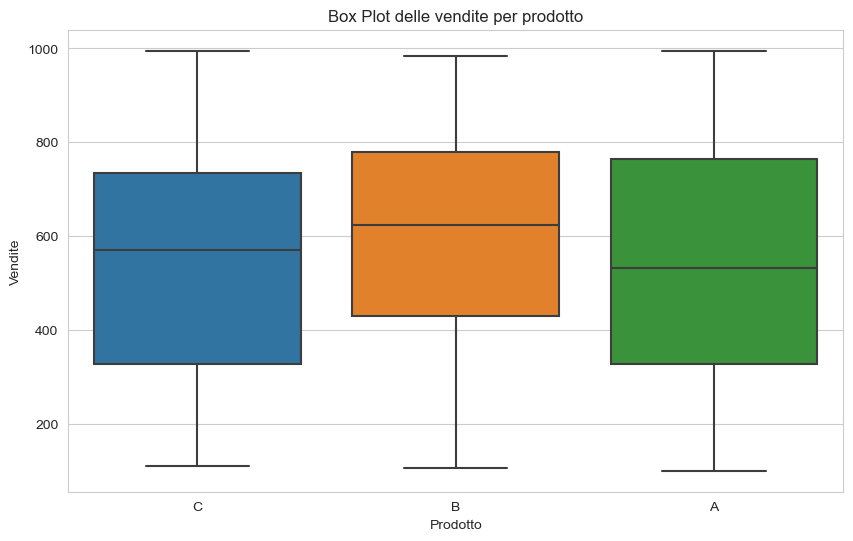

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Genera dati casuali per l'esplorazione
np.random.seed(22)
data = {
    'Data': pd.date_range(start='2023-01-01', end='2023-12-31', freq='D'),
    'Vendite': np.random.randint(100, 1000, size=365),
    'Prodotto': np.random.choice(['A', 'B', 'C'], size=365)
}

df = pd.DataFrame(data)

# Visualizza le prime righe del dataset
print(df.head())

# Visualizza un grafico delle vendite nel tempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='Data', y='Vendite', data=df)
plt.title('Andamento delle vendite nel tempo')
plt.xlabel('Data')
plt.ylabel('Vendite')
plt.xticks(rotation=45)
plt.show()

# Visualizza una box plot delle vendite per prodotto
plt.figure(figsize=(10, 6))
sns.boxplot(x='Prodotto', y='Vendite', data=df)
plt.title('Box Plot delle vendite per prodotto')
plt.xlabel('Prodotto')
plt.ylabel('Vendite')
plt.show()

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Genera dati di esempio
data = {
    'Numeric_Var': [1, 2, 3, 4, np.nan, 6],
    'Categorical_Var': ['A', 'B', 'A', 'B', 'A', 'B']
}

# Crea un DataFrame
df = pd.DataFrame(data)
print(df)

   Numeric_Var Categorical_Var
0          1.0               A
1          2.0               B
2          3.0               A
3          4.0               B
4          NaN               A
5          6.0               B


In [33]:
conditional_means = df["Numeric_Var"].fillna(df.groupby("Categorical_Var")["Numeric_Var"].transform("mean"))

   Numeric_Var Categorical_Var
0          1.0               A
1          2.0               B
2          3.0               A
3          4.0               B
4          2.0               A
5          6.0               B


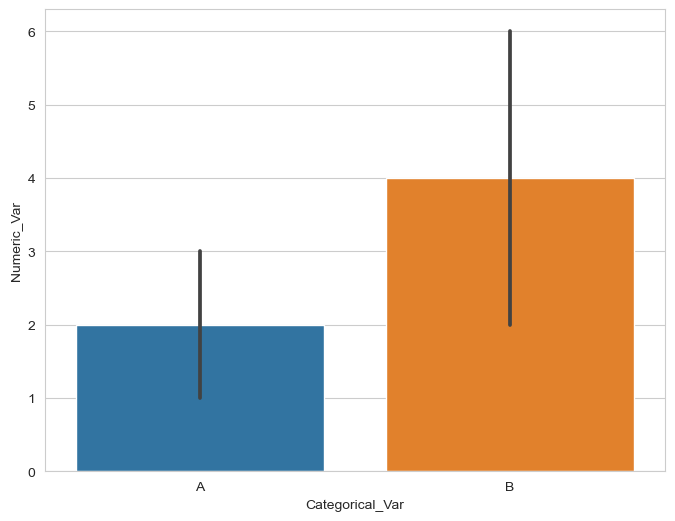

In [34]:
df["Numeric_Var"] = conditional_means
print(df)

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x="Categorical_Var", y="Numeric_Var")
plt.show()

     Età        Soddisfazione
0     56    Molto Soddisfatto
1     46  Molto Insoddisfatto
2     32               Neutro
3     60               Neutro
4     25  Molto Insoddisfatto
..   ...                  ...
495   37    Molto Soddisfatto
496   41    Molto Soddisfatto
497   29    Molto Soddisfatto
498   52    Molto Soddisfatto
499   50    Molto Soddisfatto

[500 rows x 2 columns]
     Età        Soddisfazione  Numeric_Var
0     56    Molto Soddisfatto    41.651376
1     46  Molto Insoddisfatto    40.054054
2     32               Neutro    41.747368
3     60               Neutro    41.747368
4     25  Molto Insoddisfatto    40.054054
..   ...                  ...          ...
495   37    Molto Soddisfatto    41.651376
496   41    Molto Soddisfatto    41.651376
497   29    Molto Soddisfatto    41.651376
498   52    Molto Soddisfatto    41.651376
499   50    Molto Soddisfatto    41.651376

[500 rows x 3 columns]


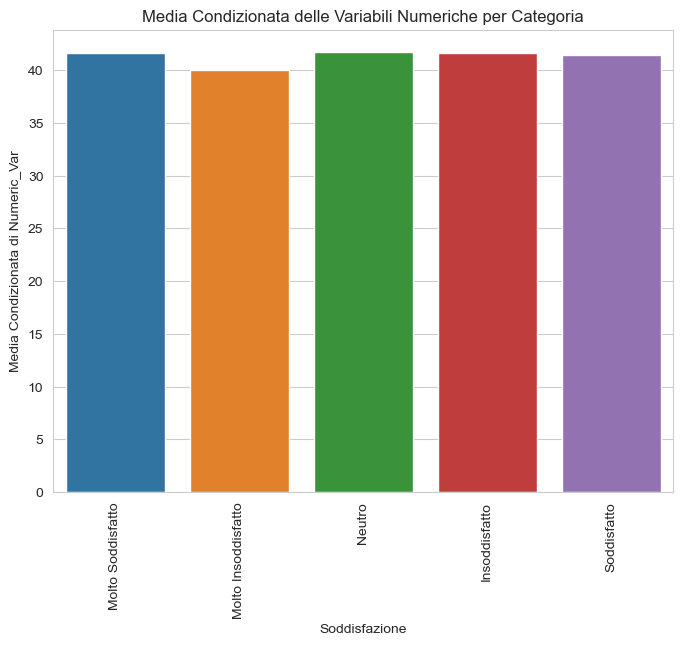

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Genera dati casuali per l'esplorazione
np.random.seed(42)
data = {
    'Età': np.random.randint(18, 65, size=500),
    'Soddisfazione': 
    np.random.choice(['Molto Soddisfatto', 'Soddisfatto', 'Neutro', 'Insoddisfatto', 'Molto Insoddisfatto'], size=500)
}

df = pd.DataFrame(data)
print(df)
conditional_means = df.groupby('Soddisfazione')['Età'].transform('mean')

df['Numeric_Var'] = conditional_means
print(df)

# Crea un grafico a barre per mostrare la media condizionata per ogni categoria
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Soddisfazione', y='Numeric_Var', errorbar=None)
plt.xlabel('Soddisfazione')
plt.ylabel('Media Condizionata di Numeric_Var')
plt.title('Media Condizionata delle Variabili Numeriche per Categoria')
plt.xticks(rotation=90)

plt.show()


In [36]:
print("chiedere questo codice")

chiedere questo codice


C:\Users\polmo\AppData\Local\Temp\ipykernel_1940\2560680438.py:13: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



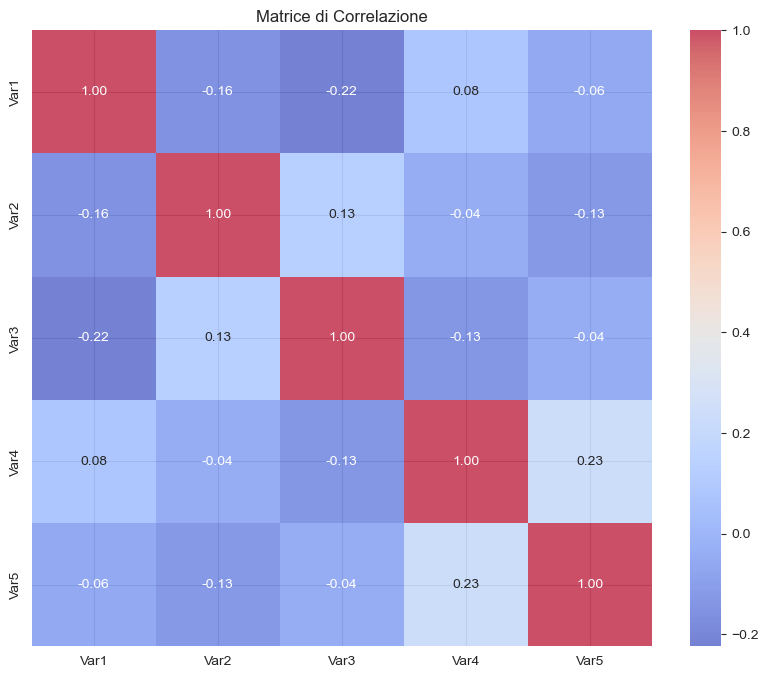

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Genera un dataset di esempio con variabili numeriche
np.random.seed(42)
data = pd.DataFrame(np.random.rand(100, 5), columns=['Var1', 'Var2', 'Var3', 'Var4', 'Var5'])

# Aggiungi alcune variabili categoriche generate casualmente
data['Categoria1'] = np.random.choice(['A', 'B', 'C'], size=100)
data['Categoria2'] = np.random.choice(['X', 'Y'], size=100)

correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", alpha=0.7)
plt.title("Matrice di Correlazione")
plt.show()

In [38]:
import pandas as pd
import numpy as np

# Impostare il seed per rendere i risultati riproducibili
np.random.seed(41)

# Creare un dataframe vuoto
df = pd.DataFrame()

# Generare dati casuali
n_rows = 10000
df['CatCol1'] = np.random.choice(['A', 'B', 'C'], size=n_rows)
df['CatCol2'] = np.random.choice(['X', 'Y'], size=n_rows)
df['NumCol1'] = np.random.randn(n_rows)
df['NumCol2'] = np.random.randint(1, 100, size=n_rows)
df['NumCol3'] = np.random.uniform(0, 1, size=n_rows)

# Calcolare il numero totale di missing values desiderati
total_missing_values = int(0.03 * n_rows * len(df.columns))

# Introdurre missing values casuali
for column in df.columns:
    num_missing_values = np.random.randint(0, total_missing_values + 1)
    missing_indices = np.random.choice(n_rows, size=num_missing_values, replace=False)
    df.loc[missing_indices, column] = np.nan
df

CatCol1 CatCol2   NumCol1  NumCol2   NumCol3
0          A     NaN  0.440877     49.0  0.246007
1          A       Y  1.945879     28.0  0.936825
2          C       X  0.988834     42.0  0.751516
3          A       Y -0.181978     73.0  0.950696
4          B       X  2.080615     74.0  0.903045
...      ...     ...       ...      ...       ...
9995       C       Y  1.352114     61.0  0.728445
9996       C       Y  1.143642     67.0  0.605930
9997       A       X -0.665794     54.0  0.071041
9998       C       Y  0.004278      NaN       NaN
9999       A       X  0.622473     95.0  0.751384

[10000 rows x 5 columns]

In [39]:
righe_con_dati_mancanti = df[df.isnull().any(axis=1)]
len(righe_con_dati_mancanti)

3648

In [40]:
righe_con_dati_mancanti = df[df.isnull().any(axis=1)]
righe_con_dati_mancanti

CatCol1 CatCol2   NumCol1  NumCol2   NumCol3
0          A     NaN  0.440877     49.0  0.246007
5          B     NaN       NaN     71.0  0.752397
6          B       X  0.080686     31.0       NaN
8          B       Y -1.291483      NaN  0.868791
12         C       Y -1.193705      8.0       NaN
...      ...     ...       ...      ...       ...
9986       C       X -0.909994      NaN  0.767918
9988       A       Y       NaN     35.0  0.149513
9989       A     NaN -0.148047      NaN  0.326089
9992       A       Y -0.048300     58.0       NaN
9998       C       Y  0.004278      NaN       NaN

[3648 rows x 5 columns]

In [41]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent

CatCol1     0.29
CatCol2    10.63
NumCol1     9.67
NumCol2    10.48
NumCol3    12.69
dtype: float64

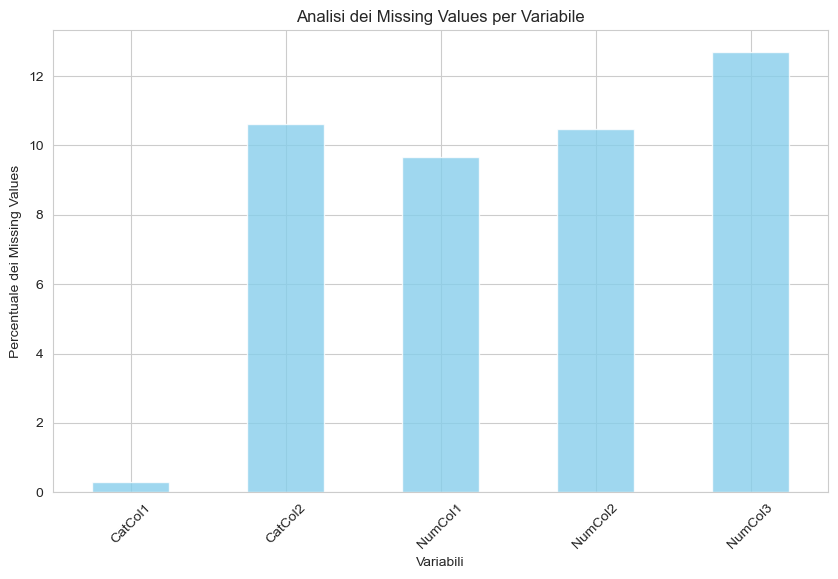

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
missing_percent.plot(kind="bar", color="skyblue", alpha=0.8)
plt.xlabel("Variabili")
plt.ylabel("Percentuale dei Missing Values")
plt.title("Analisi dei Missing Values per Variabile")
plt.xticks(rotation=45)
plt.show()

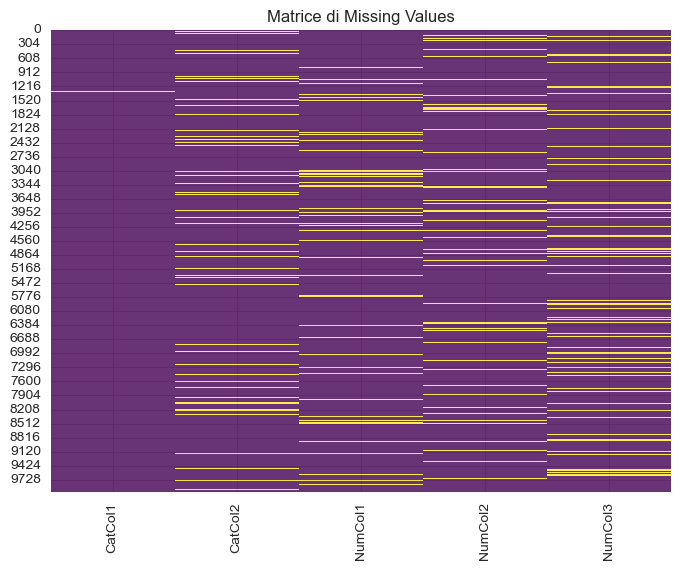

In [43]:
import seaborn as sns

missing_matrix = df.isnull()

plt.figure(figsize=(8, 6))
sns.heatmap(missing_matrix, cmap='viridis', cbar=False,alpha=0.8)
plt.title('Matrice di Missing Values')
plt.xticks(rotation = 90)
plt.show()

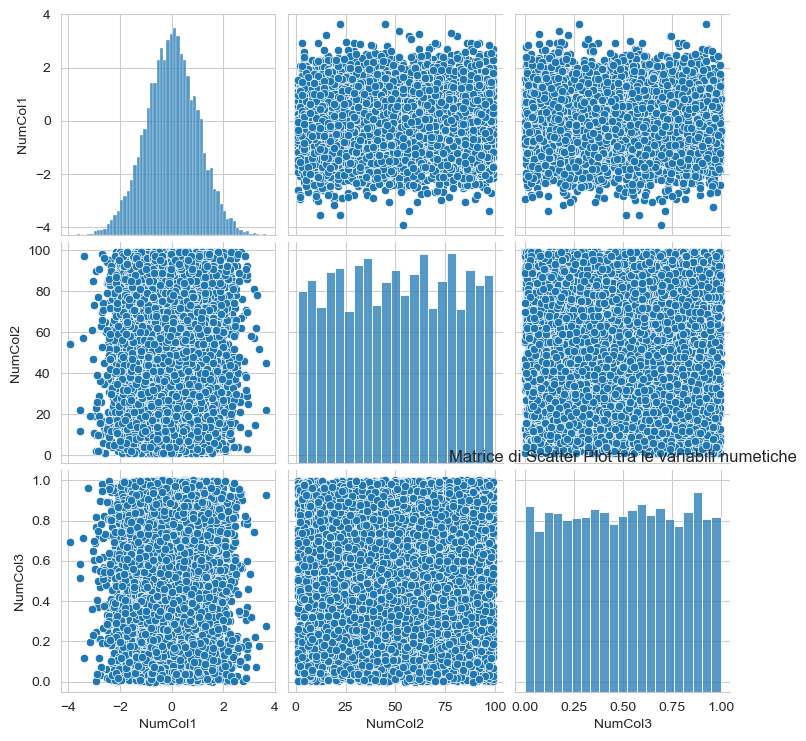

In [44]:
numeric_features = df.select_dtypes(include=[np.number])

sns.pairplot(df[numeric_features.columns])
plt.title("Matrice di Scatter Plot tra le variabili numetiche")
plt.show()

In [45]:
#Elimino le righe dove mancano contemporaneamente tutti i dati categorici
df = df.dropna(subset=["CatCol1", "CatCol2"], how="all")
df

CatCol1 CatCol2   NumCol1  NumCol2   NumCol3
0          A     NaN  0.440877     49.0  0.246007
1          A       Y  1.945879     28.0  0.936825
2          C       X  0.988834     42.0  0.751516
3          A       Y -0.181978     73.0  0.950696
4          B       X  2.080615     74.0  0.903045
...      ...     ...       ...      ...       ...
9995       C       Y  1.352114     61.0  0.728445
9996       C       Y  1.143642     67.0  0.605930
9997       A       X -0.665794     54.0  0.071041
9998       C       Y  0.004278      NaN       NaN
9999       A       X  0.622473     95.0  0.751384

[9995 rows x 5 columns]

In [46]:
#Elimino le colonne dove mancano tutti i dati numerici
df = df.dropna(subset=["NumCol1", "NumCol2", "NumCol3"], how="all")
df

CatCol1 CatCol2   NumCol1  NumCol2   NumCol3
0          A     NaN  0.440877     49.0  0.246007
1          A       Y  1.945879     28.0  0.936825
2          C       X  0.988834     42.0  0.751516
3          A       Y -0.181978     73.0  0.950696
4          B       X  2.080615     74.0  0.903045
...      ...     ...       ...      ...       ...
9995       C       Y  1.352114     61.0  0.728445
9996       C       Y  1.143642     67.0  0.605930
9997       A       X -0.665794     54.0  0.071041
9998       C       Y  0.004278      NaN       NaN
9999       A       X  0.622473     95.0  0.751384

[9975 rows x 5 columns]

In [49]:
numeric_cols = df.select_dtypes(include=["number"])
categorical_cols = df.select_dtypes(include=["number"])

df.loc[:, categorical_cols.columns] = df[categorical_cols.columns].fillna(df[categorical_cols.columns].mode().iloc[0])

conditional_means = df[numeric_cols.columns].fillna(df.groupby("CatCol1")[numeric_cols.columns].transform("mean"))

df.loc[:, numeric_cols.columns] = conditional_means

print(df)

     CatCol1 CatCol2   NumCol1  NumCol2   NumCol3
0          A     NaN  0.440877     49.0  0.246007
1          A       Y  1.945879     28.0  0.936825
2          C       X  0.988834     42.0  0.751516
3          A       Y -0.181978     73.0  0.950696
4          B       X  2.080615     74.0  0.903045
...      ...     ...       ...      ...       ...
9995       C       Y  1.352114     61.0  0.728445
9996       C       Y  1.143642     67.0  0.605930
9997       A       X -0.665794     54.0  0.071041
9998       C       Y  0.004278     38.0  0.000097
9999       A       X  0.622473     95.0  0.751384

[9975 rows x 5 columns]


C:\Users\polmo\AppData\Local\Temp\ipykernel_1940\994649504.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\polmo\AppData\Local\Temp\ipykernel_1940\994649504.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# DATABASE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Specifica il percorso del tuo file CSV
percorso_file_csv = "C:\\Users\\polmo\\OneDrive\\Documenti\\Scuola\\Robotica\\pokemons.csv"

# Leggi il file CSV in un DataFrame
df = pd.read_csv(percorso_file_csv)

# Mostra le prime righe del DataFrame (opzionale)
print(df.head())
df.shape

   id        name      rank    generation evolves_from  type1   type2  hp  \
0   1   bulbasaur  ordinary  generation-i      nothing  grass  poison  45   
1   2     ivysaur  ordinary  generation-i    bulbasaur  grass  poison  60   
2   3    venusaur  ordinary  generation-i      ivysaur  grass  poison  80   
3   4  charmander  ordinary  generation-i      nothing   fire    None  39   
4   5  charmeleon  ordinary  generation-i   charmander   fire    None  58   

   atk  def  spatk  spdef  speed  total  height  weight  \
0   49   49     65     65     45    318       7      69   
1   62   63     80     80     60    405      10     130   
2   82   83    100    100     80    525      20    1000   
3   52   43     60     50     65    309       6      85   
4   64   58     80     65     80    405      11     190   

               abilities                                               desc  
0  overgrow chlorophyll   A strange seed was planted on its back at birt...  
1  overgrow chlorophyll   

(1017, 18)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Specifica il percorso del tuo file CSV
percorso_file_excel = "C:\\Users\\polmo\\OneDrive\\Documenti\\Scuola\\Robotica\\serieA.xlsx"

# Leggi il file CSV in un DataFrame
df = pd.read_excel(percorso_file_excel, sheet_name="15-16")

# Mostra le prime righe del DataFrame (opzionale)

df

position                   team  Pt  Played  Won  Net  lose  Goals made  \
0          1      Juventus Juventus  91      38   29    4     5          75   
1          2          Napoli Napoli  82      38   25    7     6          80   
2          3              Roma Roma  80      38   23   11     4          83   
3          4            Inter Inter  67      38   20    7    11          50   
4          5  Fiorentina Fiorentina  64      38   18   10    10          60   
5          6      Sassuolo Sassuolo  61      38   16   13     9          49   
6          7            Milan Milan  57      38   15   12    11          49   
7          8            Lazio Lazio  54      38   15    9    14          52   
8          9          Chievo Chievo  50      38   13   11    14          43   
9         10          Empoli Empoli  46      38   12   10    16          40   
10        11            Genoa Genoa  46      38   13    7    18          45   
11        12          Torino Torino  45      38   12    9    17          52   
12        13      Atalanta Atalanta  45      38   11   12    15          41   
13        14        Bologna Bologna  42      38   11    9    18          33   
14        15    Sampdoria Sampdoria  40      38   10   10    18          48   
15        16        Palermo Palermo  39      38   10    9    19          38   
16        17        Udinese Udinese  39      38   10    9    19          35   
17        18            Carpi Carpi  38      38    9   11    18          37   
18        19    Frosinone Frosinone  31      38    8    7    23          35   
19        20          Verona Verona  28      38    5   13    20          34   

    Goals suffered Difference goals  
0               20               55  
1               32               48  
2               41               42  
3               38               12  
4               42               18  
5               40                9  
6               43                6  
7               52                0  
8               45               −2  
9               49               −9  
10              48               −3  
11              55               −3  
12              47               −6  
13              45              −12  
14              61              −13  
15              65              −27  
16              60              −25  
17              57              −20  
18              76              −41  
19              63              −29

In [3]:
pip install os

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [4]:
import os
import pandas as pd

# Specifica il percorso della cartella contenente i file CSV
percorso_cartella = "C:\\Users\\polmo\\OneDrive\\Documenti\\Scuola\\Robotica\\serieAnuovo"

# Lista per memorizzare tutti i DataFrame letti dai file CSV
lista_dataframes = []

# Scansiona la cartella e leggi i file CSV
for nome_file in os.listdir(percorso_cartella):
    if nome_file.endswith(".csv"):
        percorso_file_csv = os.path.join(percorso_cartella, nome_file)
        df = pd.read_csv(percorso_file_csv)
        lista_dataframes.append(df)

# Ora lista_dataframes contiene tutti i DataFrame letti dai file CSV nella cartella

In [5]:
df=lista_dataframes[0]
df.head(50)

Div      Date   HomeTeam   AwayTeam  FTHG  FTAG FTR
0   I1  29/08/93   Atalanta   Cagliari     5     2   H
1   I1  29/08/93      Genoa       Roma     2     0   H
2   I1  29/08/93      Inter   Reggiana     2     1   H
3   I1  29/08/93   Juventus  Cremonese     1     0   H
4   I1  29/08/93      Lazio     Foggia     0     0   D
5   I1  29/08/93      Lecce      Milan     0     1   A
6   I1  29/08/93     Napoli  Sampdoria     1     2   A
7   I1  29/08/93   Piacenza     Torino     0     3   A
8   I1  29/08/93    Udinese      Parma     0     1   A
9   I1  05/09/93   Cagliari    Udinese     1     2   A
10  I1  05/09/93  Cremonese     Napoli     2     0   H
11  I1  05/09/93     Foggia      Inter     1     1   D
12  I1  05/09/93      Milan      Genoa     1     0   H
13  I1  05/09/93      Parma      Lecce     1     0   H
14  I1  05/09/93   Reggiana      Lazio     0     0   D
15  I1  05/09/93       Roma   Juventus     2     1   H
16  I1  05/09/93  Sampdoria   Piacenza     2     1   H
17  I1  05/09/93     Torino   Atalanta     2     1   H
18  I1  08/09/93   Atalanta   Reggiana     2     1   H
19  I1  08/09/93      Genoa   Cagliari     1     1   D
20  I1  08/09/93      Inter  Cremonese     2     1   H
21  I1  08/09/93   Juventus  Sampdoria     3     1   H
22  I1  08/09/93      Lazio      Parma     2     1   H
23  I1  08/09/93      Lecce     Foggia     0     2   A
24  I1  08/09/93     Napoli     Torino     0     0   D
25  I1  08/09/93   Piacenza      Milan     0     0   D
26  I1  08/09/93    Udinese       Roma     0     0   D
27  I1  12/09/93   Cagliari      Inter     1     0   H
28  I1  12/09/93  Cremonese      Lazio     1     0   H
29  I1  12/09/93     Foggia   Juventus     1     1   D
30  I1  12/09/93      Milan   Atalanta     2     0   H
31  I1  12/09/93      Parma      Genoa     2     1   H
32  I1  12/09/93   Reggiana   Piacenza     1     1   D
33  I1  12/09/93       Roma     Napoli     2     3   A
34  I1  12/09/93  Sampdoria      Lecce     2     1   H
35  I1  12/09/93     Torino    Udinese     1     0   H
36  I1  19/09/93   Atalanta  Cremonese     0     0   D
37  I1  19/09/93     Foggia   Cagliari     0     1   A
38  I1  19/09/93      Genoa     Napoli     0     0   D
39  I1  19/09/93   Juventus   Reggiana     4     0   H
40  I1  19/09/93      Lazio      Inter     0     0   D
41  I1  19/09/93      Milan       Roma     2     0   H
42  I1  19/09/93      Parma     Torino     3     0   H
43  I1  19/09/93   Piacenza      Lecce     2     1   H
44  I1  19/09/93    Udinese  Sampdoria     0     2   A
45  I1  26/09/93   Cagliari      Lazio     4     1   H
46  I1  26/09/93  Cremonese      Milan     0     2   A
47  I1  26/09/93      Inter   Piacenza     2     0   H
48  I1  26/09/93      Lecce   Juventus     1     1   D
49  I1  26/09/93     Napoli    Udinese     2     1   H

In [6]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

# Creare dati casuali per altezze (variabile indipendente) e pesi (variabile dipendente)
np.random.seed(0)
altezze = np.random.normal(160, 10, 100)
pesi = 0.5 * altezze + np.random.normal(0, 5, 100)

# Suddividere il dataset in training set (70%) e test set (30%)
X_train, X_test, y_train, y_test = train_test_split(altezze, pesi, test_size=0.3, random_state=42)

# Stampare le dimensioni dei training set e test set
print("Dimensioni del Training Set (altezze e pesi):", X_train.shape, y_train.shape)
print("Dimensioni del Test Set (altezze e pesi):", X_test.shape, y_test.shape)

Dimensioni del Training Set (altezze e pesi): (70,) (70,)
Dimensioni del Test Set (altezze e pesi): (30,) (30,)


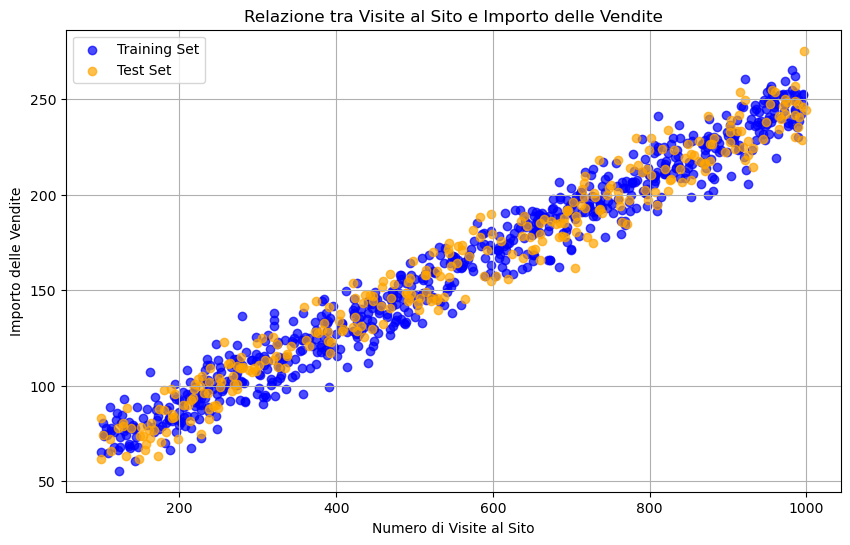

Dimensioni del Training Set (visite al sito e importo delle vendite): (700,) (700,)
Dimensioni del Test Set (visite al sito e importo delle vendite): (300,) (300,)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Creazione di dati casuali per visite al sito web e importo delle vendite
np.random.seed(0)
visite_al_sito = np.random.randint(100, 1000, 1000)
importo_vendite = 50 + 0.2 * visite_al_sito + np.random.normal(0, 10, 1000)

# Suddivisione del dataset in training set (70%) e test set (30%)
X_train, X_test, y_train, y_test = train_test_split(visite_al_sito, importo_vendite, test_size=0.3, random_state=42)

# Creazione di un grafico a dispersione
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Training Set', color='blue', alpha=0.7)
plt.scatter(X_test, y_test, label='Test Set', color='orange', alpha=0.7)
plt.xlabel('Numero di Visite al Sito')
plt.ylabel('Importo delle Vendite')
plt.title('Relazione tra Visite al Sito e Importo delle Vendite')
plt.legend()
plt.grid(True)
plt.show()

# Stampare le dimensioni dei training set e test set
print("Dimensioni del Training Set (visite al sito e importo delle vendite):", X_train.shape, y_train.shape)
print("Dimensioni del Test Set (visite al sito e importo delle vendite):", X_test.shape, y_test.shape)

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(1)
# Supponiamo di avere un dataset con feature X e target y
X = np.random.rand(100, 2)  # Dati del dataset (100 campioni, 2 feature)
y = np.random.choice(['A', 'B'], size=100)  # Etichette di classe casuali
# Calcola le proporzioni delle classi nel dataset originale
proporzione_classe_A = sum(y == 'A') / len(y)
proporzione_classe_B = 1 - proporzione_classe_A
# Eseguire uno split stratificato con una proporzione specificata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Calcola le proporzioni delle classi nel training set e nel test set
proporzione_classe_A_train = sum(y_train == 'A') / len(y_train)
proporzione_classe_B_train = 1 - proporzione_classe_A_train

proporzione_classe_A_test = sum(y_test == 'A') / len(y_test)
proporzione_classe_B_test = 1 - proporzione_classe_A_test

# Stampa delle proporzioni
print("Proporzione Classe A nel data Set completo:", proporzione_classe_A)
print("Proporzione Classe B nel data Setcompleto:", proporzione_classe_B)
print("Proporzione Classe A nel Training Set:", proporzione_classe_A_train)
print("Proporzione Classe B nel Training Set:", proporzione_classe_B_train)
print("Proporzione Classe A nel Test Set:", proporzione_classe_A_test)
print("Proporzione Classe B nel Test Set:", proporzione_classe_B_test)

Proporzione Classe A nel data Set completo: 0.54
Proporzione Classe B nel data Setcompleto: 0.45999999999999996
Proporzione Classe A nel Training Set: 0.5285714285714286
Proporzione Classe B nel Training Set: 0.4714285714285714
Proporzione Classe A nel Test Set: 0.5666666666666667
Proporzione Classe B nel Test Set: 0.43333333333333335


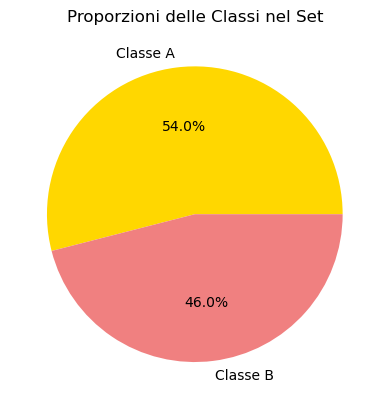

In [10]:
labels = ["Classe A", "Classe B"]
colors = ["gold", "lightcoral"]
plt.pie([proporzione_classe_A, proporzione_classe_B], labels = labels, colors=colors, autopct = '%1.1f%%')
plt.title("Proporzioni delle Classi nel Set")
plt.show()

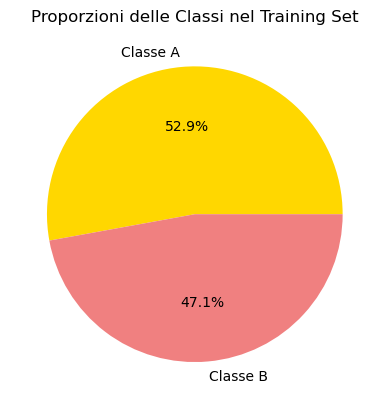

In [11]:
labels = ["Classe A", "Classe B"]
colors = ["gold", "lightcoral"]
plt.pie([proporzione_classe_A_train, proporzione_classe_B_train], labels = labels, colors=colors, autopct = '%1.1f%%')
plt.title("Proporzioni delle Classi nel Training Set")
plt.show()

In [12]:
import random
import numpy as np

dataset=[]
# Creazione di un dataset di 1000 elementi (ad esempio, dati casuali)
for i in range(1000):
    dataset.append(random.randint(1, 100))

# Estrazione di un campione casuale semplice di 50 elementi dal dataset
campione_casuale = random.sample(dataset, 300)

# Calcolo della media e della deviazione standard del campione
media_campione = np.mean(campione_casuale)
deviazione_standard_campione = np.std(campione_casuale)

# Calcolo della media e della deviazione standard del dataset completo
media_dataset = np.mean(dataset)
deviazione_standard_dataset = np.std(dataset)

print(f"Media del campione casuale: {media_campione: .2f}")
print(f"Deviazione standard del campione casuale: {deviazione_standard_campione: .2f}")
print(f"Media del dataset completo: {media_dataset: .2f}")
print(f"Deviazione standard del dataset completo: {deviazione_standard_dataset: .2f}")

Media del campione casuale:  51.03
Deviazione standard del campione casuale:  29.50
Media del dataset completo:  51.04
Deviazione standard del dataset completo:  29.13
